***
# <font color=green size=10>ESTATÍSTICA</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Importação das bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importação do dataset e armazamento do conteúdo em um DataFrame

In [ ]:
dados = pd.read_csv("dados.csv")

### Visualização do conteúdo do DataFrame

In [ ]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Construção de uma tabela de frequências considerando as classes em salários mínimos (SM)

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### Definição dos intevalos das classes em reais (R$)

In [ ]:
classes = [dados.Renda.min(), 1576, 3940, 11820, 19700, dados.Renda.max()]

### Definição dos labels das classes

In [ ]:
labels = ['E', 'D', 'C', 'B', 'A']

### Construção da coluna de frequências

In [ ]:
frequencia = pd.value_counts(pd.cut(x = dados.Renda, bins = classes, labels = labels, include_lowest = True))
frequencia

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

### Construção da coluna de percentuais

In [ ]:
percentual = pd.value_counts(pd.cut(x = dados.Renda, bins = classes, labels = labels, include_lowest = True), normalize = True) * 100
percentual

E    64.751432
D    24.208745
C     9.423477
B     1.069755
A     0.546590
Name: Renda, dtype: float64

### Colunas de frequência e percentuais juntas e ordenadas de acordo com os labels das classes

In [ ]:
dist_renda = pd.DataFrame({"Frequência" : frequencia, "Porcentagem (%)" : percentual})
dist_renda.sort_index(ascending = False)

,Frequência,Porcentagem (%)
A,420,0.546590
B,822,1.069755
C,7241,9.423477
D,18602,24.208745
E,49755,64.751432


### Construção de um gráfico de barras para visualizar as informações da tabela de frequências acima

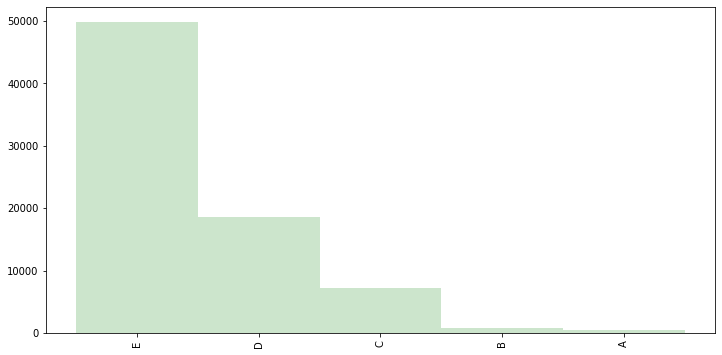

In [ ]:
dist_renda["Frequência"].plot.bar(width = 1, color = "green", alpha = 0.2, figsize = (12, 6))

> ### Conclusões

Se verifica uma discrepância relacionada com a distribuição de renda, onde poucos indivíduos tem uma renda alta e muitos indivíduos tem uma renda de até 2 salários mínimos, onde se destaca, além do fator já mencionado, a variação da classe D (de 2 a 5 salários mínimos) para a E (até 2 salários mínimos) que é de mais da metade, demonstrando a grande distinção do número de indivíduos que ganham até 2 salários mínimos dos demais.

### Histograma para as variáveis QUANTITATIVAS do dataset

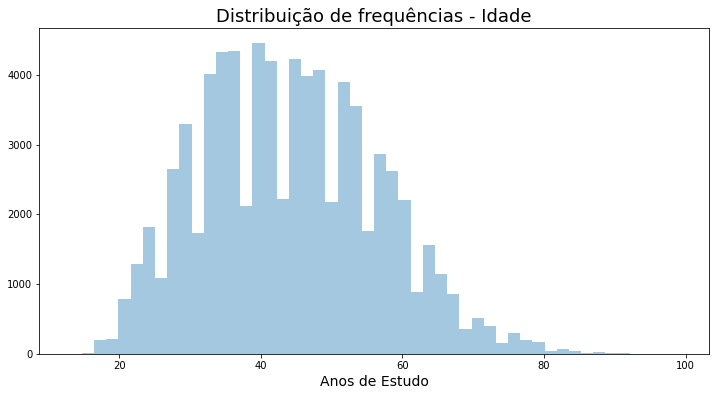

In [ ]:
ax = sns.distplot(dados.Idade, kde = False)
ax.figure.set_size_inches(12, 6)
ax.set_title("Distribuição de frequências - Idade", fontsize = 18)
ax.set_xlabel("Anos de Estudo", fontsize = 14)
ax

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


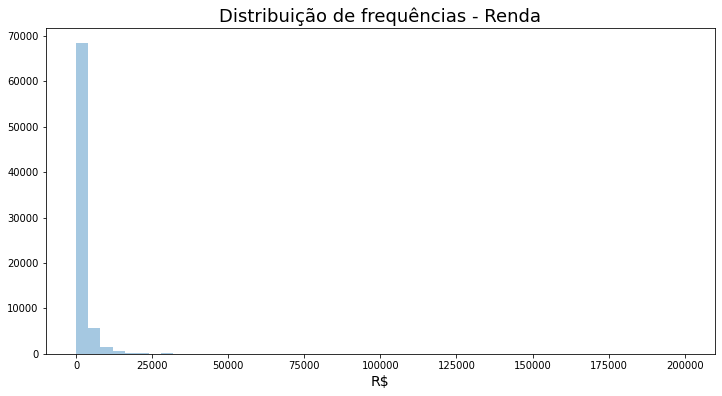

In [ ]:
ax = sns.distplot(dados.Renda, kde = False)
ax.figure.set_size_inches(12, 6)
ax.set_title("Distribuição de frequências - Renda", fontsize = 18)
ax.set_xlabel("R$", fontsize = 14)
ax

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


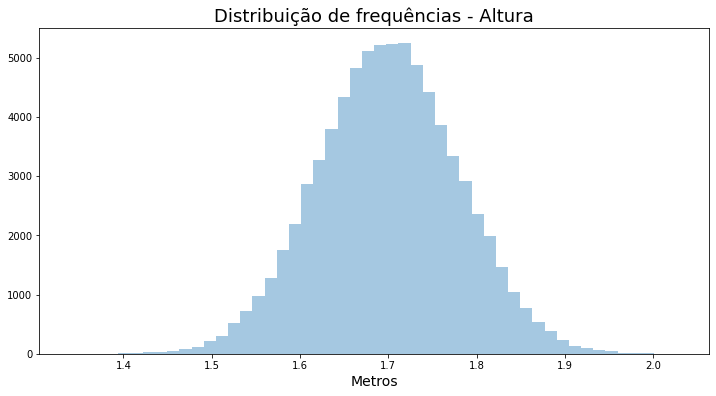

In [ ]:
ax = sns.distplot(dados.Altura, kde = False)
ax.figure.set_size_inches(12, 6)
ax.set_title("Distribuição de frequências - Altura", fontsize = 18)
ax.set_xlabel("Metros", fontsize = 14)
ax

> ### Conclusões

Como já foi mencionado, o histograma reforça a ideia de discrepância relacionada com a distribuição de renda, onde poucos indivíduos tem uma renda alta e muitos indivíduos tem uma renda de até 2 salários mínimos. Os dados de Idade não são tão discrepantes quanto os dados da renda, apresentando uma certa tendência para a direita na distribuição, o que pode demonstrar a pouca ocorrência de indivíduos de idades mais avançadas que são pessoas de referência no lar devido circunstâncias que possam estar relacionadas com a debilitação natural, doenças, ou até mesmo o óbito. Os dados de altura foram elaborados artificialmente e por isso apresentam uma distribuição mais normalizada, como preferência da elaboração.

### Um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


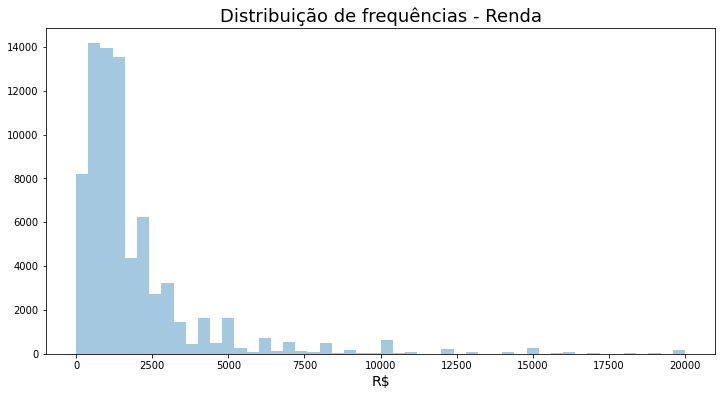

In [ ]:
ax = sns.distplot(dados.query("Renda <= 20000").Renda, kde = False)
ax.figure.set_size_inches(12, 6)
ax.set_title("Distribuição de frequências - Renda", fontsize = 18)
ax.set_xlabel("R$", fontsize = 14)
ax

### Tabela de frequências e tabela com os percentuais do cruzamento das variáveis SEXO e COR

In [ ]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [ ]:
frequencia = pd.crosstab(dados.Sexo, dados.Cor)
frequencia.rename(index = sexo, inplace = True)
frequencia.rename(columns = cor, inplace = True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [ ]:
percentual = pd.crosstab(dados.Sexo, dados.Cor, normalize = True) * 100
percentual.rename(index = sexo, inplace = True)
percentual.rename(columns = cor, inplace = True)
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


> ### Conclusões

A tabela indica uma maior ocorrência de pessoas brancas e pardas como indivíduos de referência nas residências, além de demonstrar que os homens são os que mais exercem esse papel independente da cor.

## Análise descritiva da variável RENDA

### Média aritimética

In [ ]:
dados.Renda.mean()

2000.3831988547631

### Mediana

In [ ]:
dados.Renda.median()

1200.0

### Moda

In [ ]:
dados.Renda.mode()

0    788
dtype: int64

### Desvio médio absoluto

In [ ]:
dados.Renda.mad()

1526.4951371638058

### Variância

In [ ]:
dados.Renda.var()

11044906.006217021

### Desvio-padrão

In [ ]:
dados.Renda.std()

3323.3877303464037

### Média, mediana e valor máximo da variável RENDA segundo SEXO e COR

In [ ]:
frequencia = pd.crosstab(dados.Sexo, dados.Cor, aggfunc = "mean", values = dados.Renda)
frequencia.rename(index = sexo, inplace = True)
frequencia.rename(columns = cor, inplace = True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


In [ ]:
frequencia = pd.crosstab(dados.Sexo, dados.Cor, aggfunc = "median", values = dados.Renda)
frequencia.rename(index = sexo, inplace = True)
frequencia.rename(columns = cor, inplace = True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,797.5,1700.0,1200.0,2800.0,1200.0
Feminino,788.0,1200.0,800.0,1500.0,800.0


In [ ]:
frequencia = pd.crosstab(dados.Sexo, dados.Cor, aggfunc = "max", values = dados.Renda)
frequencia.rename(index = sexo, inplace = True)
frequencia.rename(columns = cor, inplace = True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,10000,200000,50000,50000,100000
Feminino,120000,100000,23000,20000,30000


> ### Conclusões

Foi evidenciado uma discrepância de certa forma considerável entre a renda média dos indivíduos de cor amarela dos demais, além de somente as mulheres indígenas receberem valores maiores que os homens indígenas. As medianas relacionadas ao valor da renda continua demonstrando que também é superior para indivíduos de cor amarela, além de demonstrar valores maiores para o sexo masculino independente da cor. O valor máximo da renda demonstra uma superioridade vinculada com a cor parda, além de mostrar que os homens alcançam salários maiores que as mulheres com exceção da cor indígena (o que deixa uma dúvida relacionada ao valor do indivíduo que mais recebe nessa classse de cor estar interferindo em certas medidas de tendência central).

### Medidas de dispersão da variável RENDA segundo SEXO e COR

In [ ]:
frequencia = pd.crosstab(dados.Sexo, dados.Cor, aggfunc = "mad", values = dados.Renda)
frequencia.rename(index = sexo, inplace = True)
frequencia.rename(columns = cor, inplace = True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,798.910889,2261.012346,975.602482,3709.597211,1125.827704
Feminino,3007.892952,1670.967106,705.453357,2549.146322,811.580946


In [ ]:
frequencia = pd.crosstab(dados.Sexo, dados.Cor, aggfunc = "var", values = dados.Renda)
frequencia.rename(index = sexo, inplace = True)
frequencia.rename(columns = cor, inplace = True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1.449841e+06,2.257002e+07,3.749294e+06,3.295707e+07,5.345747e+06
Feminino,1.429818e+08,1.056909e+07,1.821960e+06,1.392166e+07,2.547960e+06


In [ ]:
frequencia = pd.crosstab(dados.Sexo, dados.Cor, aggfunc = "std", values = dados.Renda)
frequencia.rename(index = sexo, inplace = True)
frequencia.rename(columns = cor, inplace = True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1204.093490,4750.791872,1936.309271,5740.82482,2312.087184
Feminino,11957.498292,3251.013154,1349.799809,3731.17366,1596.233048


> ### Conclusões

Como previsto, os dados de renda para mulheres indígenas possuem uma variância e desvio padrão bastante alto, indicando que não necessariamente as mulheres indígenas ganham mais do que os homens ou alcançam salários maiores, além disso, os valores das medidas de dispersão dos homens de outra cor também possuem certa variância e desvio padrão maior do que das mulheres, apesar de não ser tão discrepante quanto o das mulheres indígenas e também não ser tão distinta das variâncias e desvio padrão das mulheres de mesma cor.

### Box plot da variável RENDA segundo SEXO e COR

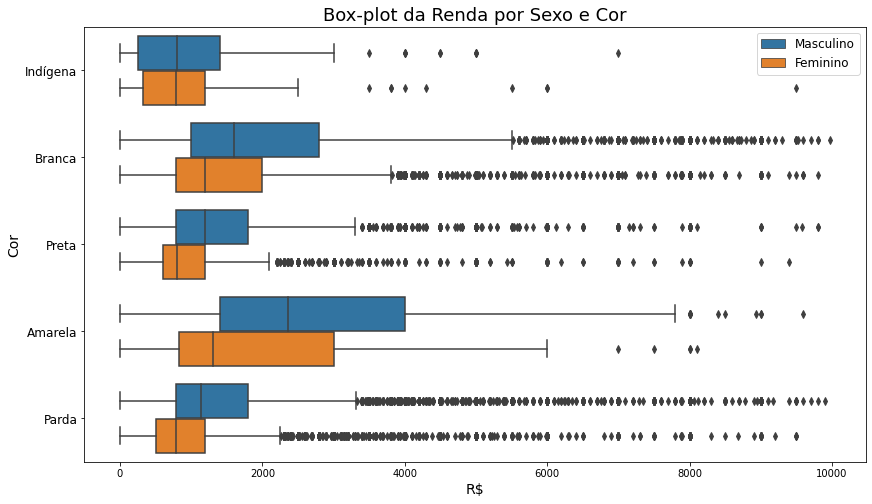

In [ ]:
ax = sns.boxplot(x = 'Renda', y = 'Cor', hue = 'Sexo', data = dados.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(14, 8)
ax.set_title('Box-plot da Renda por Sexo e Cor', fontsize = 18)
ax.set_xlabel('R$', fontsize = 14)
ax.set_ylabel('Cor', fontsize = 14)
ax.set_yticklabels(['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda', 'Sem declaração'], fontsize = 12)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize = 12)
ax

> ### Conclusões

É identificado uma discrepância entre os valores dos salários dos homens em relação com as mulheres, onde os homens, além de possuírem uma maior região na área do interquartil segundo a representação, ainda se posicionam em direção aos valores maiores, ou seja, na frente das mulheres no eixo x, o que nos faz inferir que mesmo com uma dispersão maior nos dados de renda os homens tem salários maiores que as mulheres.

### Percentual de pessoas do <i>dataset</i> que ganham um salário mínimo (R$ 788,00) ou menos


In [ ]:
from scipy import stats
percentual = stats.percentileofscore(dados.Renda, 788, kind = "weak")
print(f"{percentual}%")

28.86777719937533%


### Valor máximo ganho por 99% das pessoas do <i>dataset</i>

In [ ]:
dados.Renda.quantile(.99)

15000.0

### Média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO

In [ ]:
frequencia = pd.crosstab(dados.Sexo, dados["Anos de Estudo"], aggfunc = "mean", values = dados.Renda)
frequencia.rename(index = sexo, inplace = True)
frequencia.rename(columns = anos_de_estudo, inplace = True)
frequencia

Anos de Estudo,Sem instrução e menos de 1 ano,1 ano,2 anos,3 anos,4 anos,5 anos,6 anos,7 anos,8 anos,9 anos,10 anos,11 anos,12 anos,13 anos,14 anos,15 anos ou mais,Não determinados
Sexo,,,,,,,,,,,,,,,,,
Masculino,799.494638,895.629047,931.178986,1109.203862,1302.329283,1338.653218,1448.875419,1465.497940,1639.396667,1508.03885,1731.270847,2117.060504,2470.330776,3195.099154,3706.620269,6134.279790,1295.761905
Feminino,516.201748,492.771987,529.911638,546.853916,704.279111,781.389776,833.732824,830.751004,933.615351,868.02170,925.919225,1286.790889,1682.313725,1911.730047,2226.460457,3899.513231,798.174419


In [ ]:
frequencia = pd.crosstab(dados.Sexo, dados["Anos de Estudo"], aggfunc = "median", values = dados.Renda)
frequencia.rename(index = sexo, inplace = True)
frequencia.rename(columns = anos_de_estudo, inplace = True)
frequencia

Anos de Estudo,Sem instrução e menos de 1 ano,1 ano,2 anos,3 anos,4 anos,5 anos,6 anos,7 anos,8 anos,9 anos,10 anos,11 anos,12 anos,13 anos,14 anos,15 anos ou mais,Não determinados
Sexo,,,,,,,,,,,,,,,,,
Masculino,700,788,788,800,1000,1045,1200,1200,1300,1200,1218,1500,1800,2400,2500,4000,1200
Feminino,390,400,450,500,788,788,788,788,800,788,800,1000,1200,1300,1600,2800,788


In [ ]:
frequencia = pd.crosstab(dados.Sexo, dados["Anos de Estudo"], aggfunc = "max", values = dados.Renda)
frequencia.rename(index = sexo, inplace = True)
frequencia.rename(columns = anos_de_estudo, inplace = True)
frequencia

Anos de Estudo,Sem instrução e menos de 1 ano,1 ano,2 anos,3 anos,4 anos,5 anos,6 anos,7 anos,8 anos,9 anos,10 anos,11 anos,12 anos,13 anos,14 anos,15 anos ou mais,Não determinados
Sexo,,,,,,,,,,,,,,,,,
Masculino,30000,30000,40000,80000,50000,35000,25000,40000,30000,60000,45000,200000,30000,25000,50000,200000,7000
Feminino,10000,2000,4000,3500,10000,8000,6000,9000,18000,20000,6000,100000,120000,20000,20000,100000,3000


In [ ]:
frequencia = pd.crosstab(dados.Sexo, dados["Anos de Estudo"], aggfunc = "std", values = dados.Renda)
frequencia.rename(index = sexo, inplace = True)
frequencia.rename(columns = anos_de_estudo, inplace = True)
frequencia

Anos de Estudo,Sem instrução e menos de 1 ano,1 ano,2 anos,3 anos,4 anos,5 anos,6 anos,7 anos,8 anos,9 anos,10 anos,11 anos,12 anos,13 anos,14 anos,15 anos ou mais,Não determinados
Sexo,,,,,,,,,,,,,,,,,
Masculino,1023.904884,1331.950552,1435.173827,2143.800133,1419.821787,1484.650587,1476.628602,1419.708673,1515.583715,2137.664774,2078.609734,2676.538942,2268.081538,2797.116800,3987.214974,7447.613594,979.648745
Feminino,639.311534,425.291842,498.234168,424.124446,629.553397,635.782641,574.547028,602.038029,896.781213,973.221652,620.611907,1819.040417,4851.833513,2053.789771,2064.083336,4212.770709,459.985964


### Box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO

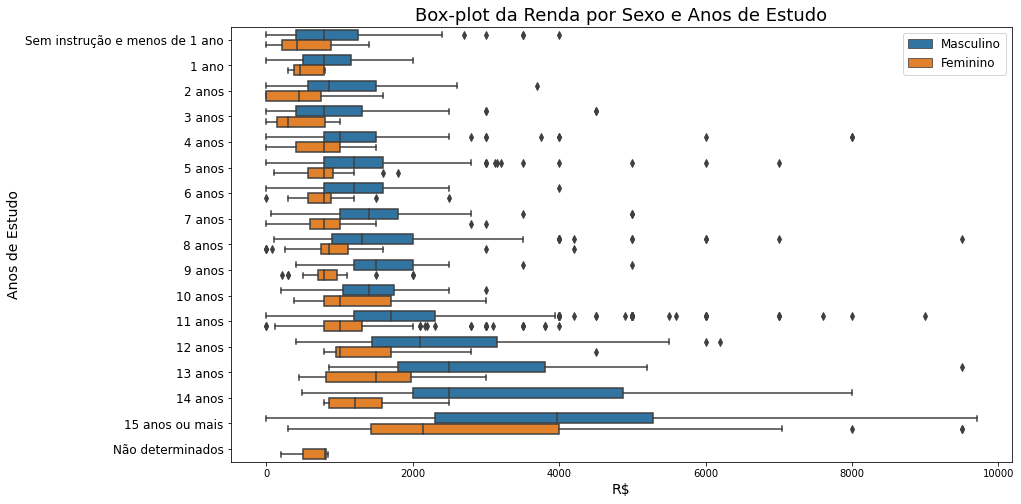

In [ ]:
ax = sns.boxplot(x = 'Renda', y = 'Anos de Estudo', hue = 'Sexo', data = dados.query('Renda < 10000 and Idade == 40'), orient = 'h')
ax.figure.set_size_inches(14, 8)
ax.set_title('Box-plot da Renda por Sexo e Anos de Estudo', fontsize = 18)
ax.set_xlabel('R$', fontsize = 14)
ax.set_ylabel('Anos de Estudo', fontsize = 14)
ax.set_yticklabels(['Sem instrução e menos de 1 ano', '1 ano', '2 anos', '3 anos', '4 anos', '5 anos', '6 anos', '7 anos', '8 anos', '9 anos', '10 anos', '11 anos', '12 anos', '13 anos', '14 anos', '15 anos ou mais', 'Não determinados'], fontsize = 12)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize = 12)
ax

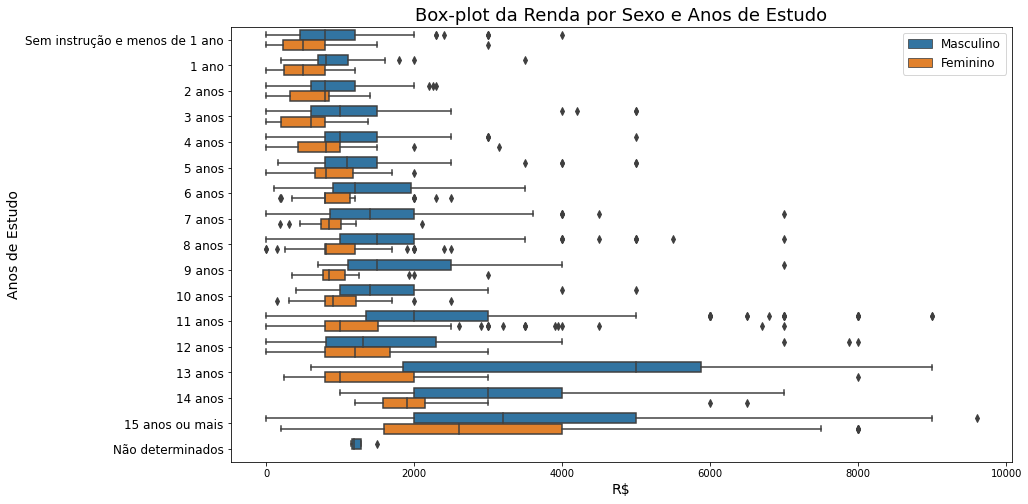

In [ ]:
ax = sns.boxplot(x = 'Renda', y = 'Anos de Estudo', hue = 'Sexo', data = dados.query('Renda < 10000 and Idade == 50'), orient = 'h')
ax.figure.set_size_inches(14, 8)
ax.set_title('Box-plot da Renda por Sexo e Anos de Estudo', fontsize = 18)
ax.set_xlabel('R$', fontsize = 14)
ax.set_ylabel('Anos de Estudo', fontsize = 14)
ax.set_yticklabels(['Sem instrução e menos de 1 ano', '1 ano', '2 anos', '3 anos', '4 anos', '5 anos', '6 anos', '7 anos', '8 anos', '9 anos', '10 anos', '11 anos', '12 anos', '13 anos', '14 anos', '15 anos ou mais', 'Não determinados'], fontsize = 12)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize = 12)
ax

> ### Conclusões

É identificado pela representação que independente do grau de educação o cenário continua o mesmo, com os homens ganhando mais que as mulheres.

### Média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO

In [ ]:
frequencia = pd.crosstab(dados.Sexo, dados["UF"], aggfunc = "mean", values = dados.Renda)
frequencia.rename(index = sexo, inplace = True)
frequencia.rename(columns = uf, inplace = True)
frequencia

UF,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,...,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
Sexo,,,,,,,,,,,,,,,,,,,,,
Masculino,1921.209139,1635.342407,1539.989460,1875.788136,1509.741894,1930.396970,1912.509395,1165.172097,1146.710618,1341.616974,...,2129.324226,2777.552792,2947.742872,2767.429211,2688.304121,2488.392840,2603.484296,2335.347994,2222.632558,4863.366321
Feminino,1414.854637,1128.615063,1235.832849,1608.112903,1131.884114,1736.164835,1381.798851,723.752542,899.858757,1085.795053,...,1752.707022,1971.532508,1950.176471,1796.263244,1792.114130,1960.845376,1519.891832,1604.293651,1339.376392,3269.883895


In [ ]:
frequencia = pd.crosstab(dados.Sexo, dados["UF"], aggfunc = "median", values = dados.Renda)
frequencia.rename(index = sexo, inplace = True)
frequencia.rename(columns = uf, inplace = True)
frequencia

UF,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,...,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
Sexo,,,,,,,,,,,,,,,,,,,,,
Masculino,1300.0,1000.0,1000.0,1125.0,980.0,1337.5,1100.0,788.0,788.0,800.0,...,1500.0,1510.0,1820.0,1800.0,2000.0,1600.0,1600.0,1576.0,1500.0,2500.0
Feminino,1000.0,788.0,800.0,875.0,788.0,920.0,788.0,480.0,600.0,788.0,...,927.0,1040.5,1200.0,1200.0,1283.5,1200.0,988.0,1000.0,900.0,1500.0


In [ ]:
frequencia = pd.crosstab(dados.Sexo, dados["UF"], aggfunc = "max", values = dados.Renda)
frequencia.rename(index = sexo, inplace = True)
frequencia.rename(columns = uf, inplace = True)
frequencia

UF,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,...,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
Sexo,,,,,,,,,,,,,,,,,,,,,
Masculino,50000,30000,22000,20000,50000,15000,60000,30000,40000,25000,...,40000,200000,80000,200000,80000,35000,42000,35000,30000,100000
Feminino,12500,15000,15000,18000,16000,15580,9000,8500,30000,24000,...,100000,120000,50000,25000,13000,25000,25000,20000,26000,30000


In [ ]:
frequencia = pd.crosstab(dados.Sexo, dados["UF"], aggfunc = "std", values = dados.Renda)
frequencia.rename(index = sexo, inplace = True)
frequencia.rename(columns = uf, inplace = True)
frequencia

UF,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,...,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
Sexo,,,,,,,,,,,,,,,,,,,,,
Masculino,2644.124716,2493.549324,1878.401328,2138.133218,2209.084120,1984.400879,3291.585681,2186.972819,2485.364779,1842.209640,...,2637.156594,5562.918613,3748.021844,4850.756071,3447.896091,3049.801331,3324.348704,2760.465729,2382.046659,6243.910465
Feminino,1476.688370,1405.459802,1436.591274,1957.175909,1587.778044,2084.577964,1516.365583,981.791872,2070.225245,1770.042112,...,5160.621957,4446.614757,2767.421405,2249.056098,1693.541576,2576.786100,2083.725272,1765.822300,1497.896843,4061.459901


### Box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO

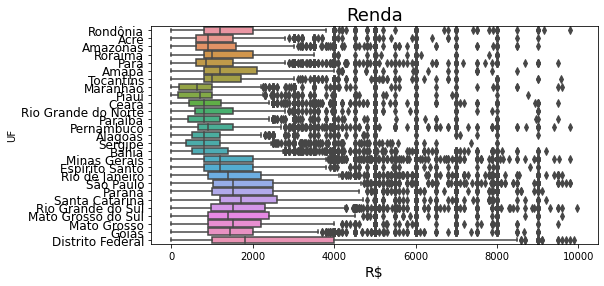

In [ ]:
ax = sns.boxplot(x = 'Renda', y = 'UF', data = dados.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(8, 4)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax.set_yticklabels(['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá', 'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia', 'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo', 'Paraná', 'Santa Catarina', 'Rio Grande do Sul', 'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal'], fontsize = 12)
ax

> ### Conclusões

É verificado que as regiões voltadas mais para ao sul do país são as regiões que possuem indivíduos que tem um maior salário base levando em consideração todo o conjunto de dados relacionado com o estado, onde o Distrito Federal se destaca pela discrepância se comparado com os outros estados, o que pode estar relacionado com a sede da atividade política estar concentrada no estado. Também identificamos a maior baixa de renda na região nordeste do país.